In [3]:
import sys
sys.path.append('..')
from graphIO import graphIO
from graphIO.regions_mapper import RegionsMapper
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import datasets, plotting

In [4]:
MAPPING_FILE = "C:/Users/mosta/OneDrive - UNCG/Academics/CSC 699 - Thesis/data/regions/AAL116.txt"
PPMI_DIR = "C:/Users/mosta/OneDrive - UNCG/Academics/CSC 699 - Thesis\data\ppmi"
SIGNIFICANCE_LEVEL = 0.05
ASYM_DIFF_METHOD = 'abs_diff'

In [6]:
ppmi_data = graphIO.read_ppmi_data(PPMI_DIR)
# Fetch the AAL atlas
aal_atlas = datasets.fetch_atlas_aal(version='SPM12')
# Load the atlas maps and labels
atlas_filename = aal_atlas.maps
labels = aal_atlas.labels
# Get the coordinates of the AAL atlas regions
coords = plotting.find_parcellation_cut_coords(labels_img=atlas_filename)

Processing directories:   0%|          | 0/209 [00:00<?, ?it/s]

Processing directories: 100%|██████████| 209/209 [00:00<00:00, 229.90it/s]


In [7]:
print(ppmi_data.keys())
for k in ppmi_data.keys():
    print(k, len(ppmi_data[k]))

dict_keys(['sub-control', 'sub-patient', 'sub-prodromal', 'sub-swedd'])
sub-control 15
sub-patient 113
sub-prodromal 67
sub-swedd 14


In [8]:
regions = RegionsMapper(MAPPING_FILE)
print(f'{regions.regions_count()} regions loaded')

116 regions loaded


In [9]:
control_matrices = np.array([ppmi_data['sub-control'][i] for i in ppmi_data['sub-control']])
patient_matrices = np.array([ppmi_data['sub-patient'][i] for i in ppmi_data['sub-patient']])
prodromal_matrices = np.array([ppmi_data['sub-prodromal'][i] for i in ppmi_data['sub-prodromal']])
swedd_matrices = np.array([ppmi_data['sub-swedd'][i] for i in ppmi_data['sub-swedd']])
print(f'Control Martices: {control_matrices.shape}, Patient Matrices: {patient_matrices.shape}, Prodormal Matrices: {prodromal_matrices.shape}, SWEDD Matrices: {swedd_matrices.shape}')

Control Martices: (15, 116, 116), Patient Matrices: (113, 116, 116), Prodormal Matrices: (67, 116, 116), SWEDD Matrices: (14, 116, 116)


In [39]:
matrices = np.concatenate((control_matrices, patient_matrices, prodromal_matrices, swedd_matrices), axis=0)
print(f'All Matrices: {matrices.shape}')

All Matrices: (209, 116, 116)


In [40]:
global_min = np.min(matrices)
global_max = np.max(matrices)
print(f'Global Min: {global_min}, Global Max: {global_max}')

Global Min: 0.0, Global Max: 2.98276


In [41]:
matrices_list = [control_matrices, patient_matrices, prodromal_matrices, swedd_matrices]
for matrices in matrices_list:
    # Convert the list of matrices to a numpy array
    matrices_array = np.array(matrices)
    
    # Calculate the average minimum
    avg_min = np.mean(np.min(matrices_array, axis=(1, 2)))
    
    # Calculate the average maximum
    avg_max = np.mean(np.max(matrices_array, axis=(1, 2)))
    
    # Calculate the variance
    variance = np.var(matrices_array)
    
    # Calculate the mean
    mean = np.mean(matrices_array)
    
    # Print the results
    print("Average Minimum:", avg_min)
    print("Average Maximum:", avg_max)
    print("Variance:", variance)
    print("Mean:", mean)
    print()

Average Minimum: 0.0
Average Maximum: 2.9114986666666667
Variance: 0.49153668530543987
Mean: 0.9999999879112169

Average Minimum: 1.769911504424779e-07
Average Maximum: 2.9002684070796465
Variance: 0.4782203112035035
Mean: 1.000000000289373

Average Minimum: 0.20839582089552242
Average Maximum: 2.5646026865671647
Variance: 0.38015507576113533
Mean: 1.0000001981693794

Average Minimum: 7.142857142857143e-07
Average Maximum: 2.8980771428571432
Variance: 0.4731470942307455
Mean: 0.9999999874723969



In [42]:
control_matrix_population = np.mean(control_matrices, axis=0)
patient_matrix_population = np.mean(patient_matrices, axis=0)
prodromal_matrix_population = np.mean(prodromal_matrices, axis=0)
swedd_matrix_population = np.mean(swedd_matrices, axis=0)
print(f'Control Population Matrix: {control_matrix_population.shape}, Patient Population Matrix: {patient_matrix_population.shape}, Prodormal Population Matrix: {prodromal_matrix_population.shape}, SWEDD Population Matrix: {swedd_matrix_population.shape}')

Control Population Matrix: (116, 116), Patient Population Matrix: (116, 116), Prodormal Population Matrix: (116, 116), SWEDD Population Matrix: (116, 116)


In [43]:
control_matrix_population

array([[2.66017067, 2.34296533, 2.09705867, ..., 1.022788  , 1.01254   ,
        1.01333667],
       [2.34296533, 2.66362133, 1.63699733, ..., 0.945724  , 1.165382  ,
        1.21581333],
       [2.09705867, 1.63699733, 2.70197   , ..., 0.87680267, 0.70069   ,
        0.816618  ],
       ...,
       [1.022788  , 0.945724  , 0.87680267, ..., 2.801162  , 2.300938  ,
        1.82563267],
       [1.01254   , 1.165382  , 0.70069   , ..., 2.300938  , 2.82093067,
        2.20210667],
       [1.01333667, 1.21581333, 0.816618  , ..., 1.82563267, 2.20210667,
        2.81383267]])

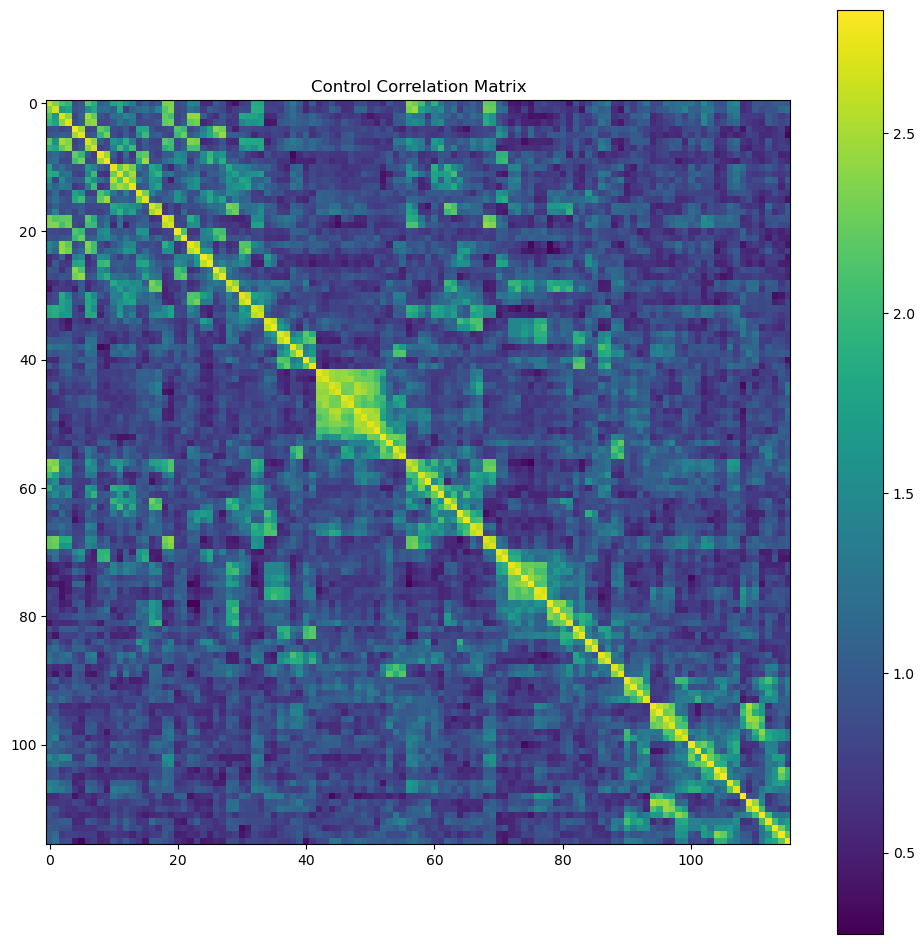

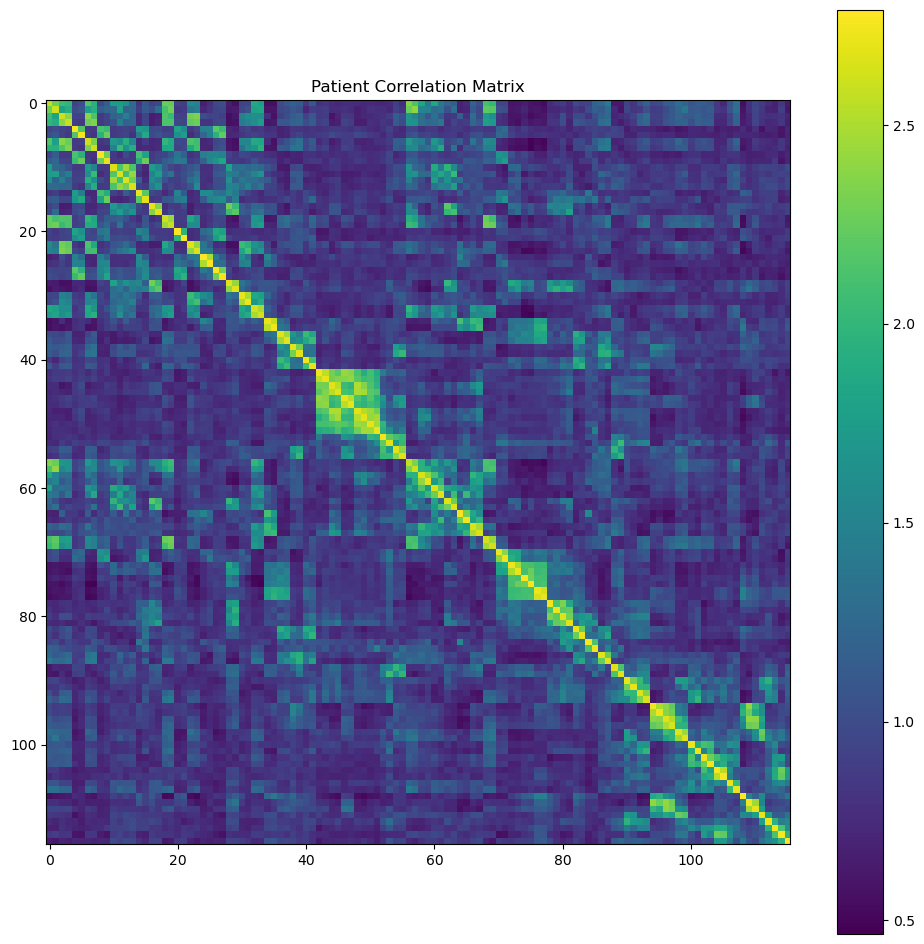

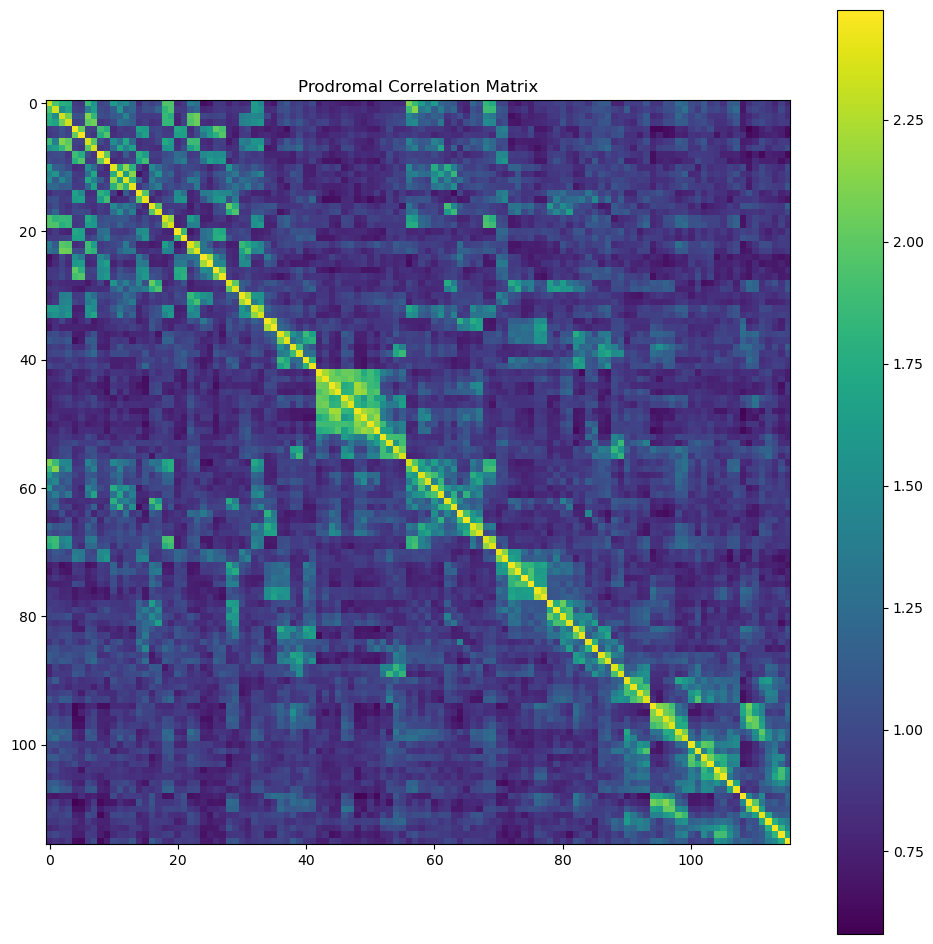

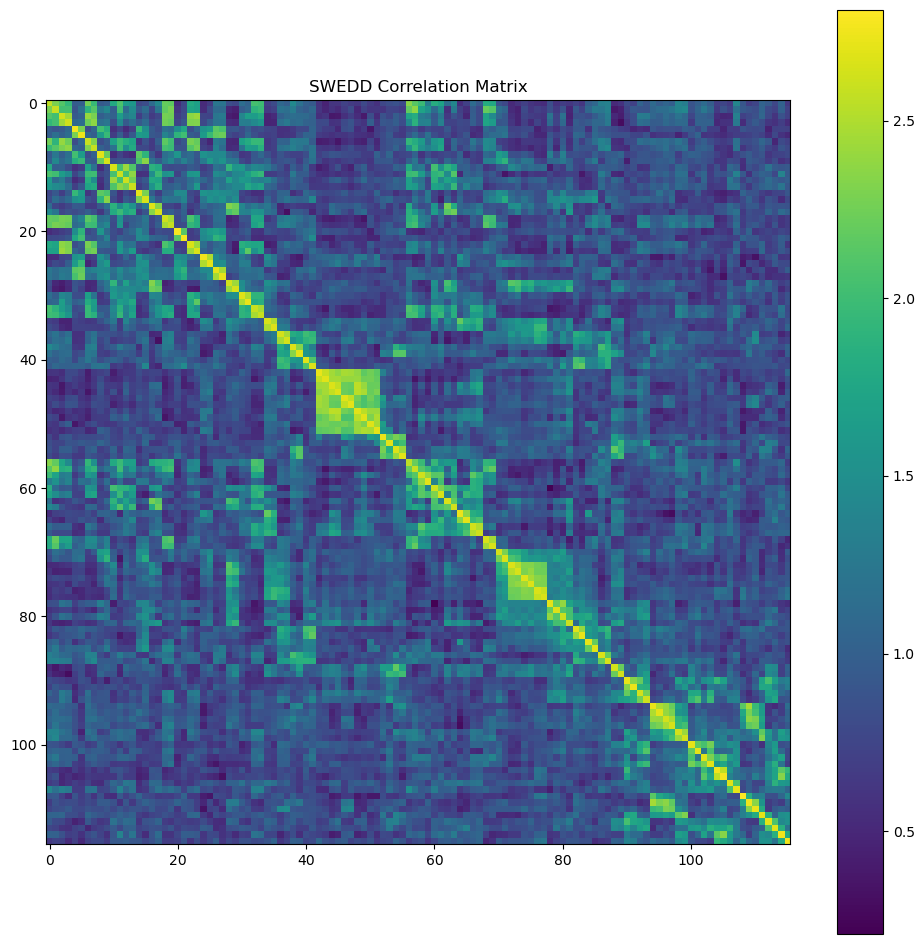

In [44]:
# Plotting the control correlation matrix
plt.figure(figsize=(12, 12))
plt.imshow(control_matrix_population, cmap='viridis')
plt.colorbar()
plt.title('Control Correlation Matrix')
plt.show()

# Plotting the patient correlation matrix
plt.figure(figsize=(12, 12))
plt.imshow(patient_matrix_population, cmap='viridis')
plt.colorbar()
plt.title('Patient Correlation Matrix')
plt.show()

# Plotting the prodromal correlation matrix
plt.figure(figsize=(12, 12))
plt.imshow(prodromal_matrix_population, cmap='viridis')
plt.colorbar()
plt.title('Prodromal Correlation Matrix')
plt.show()

# Plotting the SWEDD correlation matrix
plt.figure(figsize=(12, 12))
plt.imshow(swedd_matrix_population, cmap='viridis')
plt.colorbar()
plt.title('SWEDD Correlation Matrix')
plt.show()

In [45]:
control_flat = control_matrices.reshape(control_matrices.shape[0], -1)
patient_flat = patient_matrices.reshape(patient_matrices.shape[0], -1)
prodromal_flat = prodromal_matrices.reshape(prodromal_matrices.shape[0], -1)
swedd_flat = swedd_matrices.reshape(swedd_matrices.shape[0], -1)
print(f'Control Flat: {control_flat.shape}, Patient Flat: {patient_flat.shape}, Prodormal Flat: {prodromal_flat.shape}, SWEDD Flat: {swedd_flat.shape}')

Control Flat: (15, 13456), Patient Flat: (113, 13456), Prodormal Flat: (67, 13456), SWEDD Flat: (14, 13456)


In [46]:
t_stat, p_values_patient = ttest_ind(control_flat, patient_flat, axis=0)
t_stat, p_values_prodromal = ttest_ind(control_flat, prodromal_flat, axis=0)
t_stat, p_values_swedd = ttest_ind(control_flat, swedd_flat, axis=0)

In [47]:
p_values_matrix_patient = p_values_patient.reshape(control_matrices.shape[1], control_matrices.shape[2])
p_values_matrix_prodromal = p_values_prodromal.reshape(control_matrices.shape[1], control_matrices.shape[2])
p_values_matrix_swedd = p_values_swedd.reshape(control_matrices.shape[1], control_matrices.shape[2])

# Evaluate the number of samples per class
n_control = len(control_matrices)
n_patient = len(patient_matrices)
n_prodromal = len(prodromal_matrices)
n_swedd = len(swedd_matrices)

print(f"Number of control samples: {n_control}")
print(f"Number of patient samples: {n_patient}")
print(f"Number of prodromal samples: {n_prodromal}")
print(f"Number of SWEDD samples: {n_swedd}")

Number of control samples: 15
Number of patient samples: 113
Number of prodromal samples: 67
Number of SWEDD samples: 14


In [48]:
p_significant_patient = p_values_matrix_patient < SIGNIFICANCE_LEVEL
p_significant_prodromal = p_values_matrix_prodromal < SIGNIFICANCE_LEVEL
p_significant_swedd = p_values_matrix_swedd < SIGNIFICANCE_LEVEL

In [49]:
p_significant_count_patient = np.sum(p_significant_patient)
p_significant_count_prodromal = np.sum(p_significant_prodromal)
p_significant_count_swedd = np.sum(p_significant_swedd)
p_significant_percentage_patient = p_significant_count_patient / p_values_matrix_patient.size
p_significant_percentage_prodromal = p_significant_count_prodromal / p_values_matrix_prodromal.size
p_significant_percentage_swedd = p_significant_count_swedd / p_values_matrix_swedd.size
print(f"Number of significant patient p-values: {p_significant_count_patient} ({p_significant_percentage_patient:.2%})")
print(f"Number of significant prodromal p-values: {p_significant_count_prodromal} ({p_significant_percentage_prodromal:.2%})")
print(f"Number of significant SWEDD p-values: {p_significant_count_swedd} ({p_significant_percentage_swedd:.2%})")

Number of significant patient p-values: 804 (5.98%)
Number of significant prodromal p-values: 1947 (14.47%)
Number of significant SWEDD p-values: 908 (6.75%)


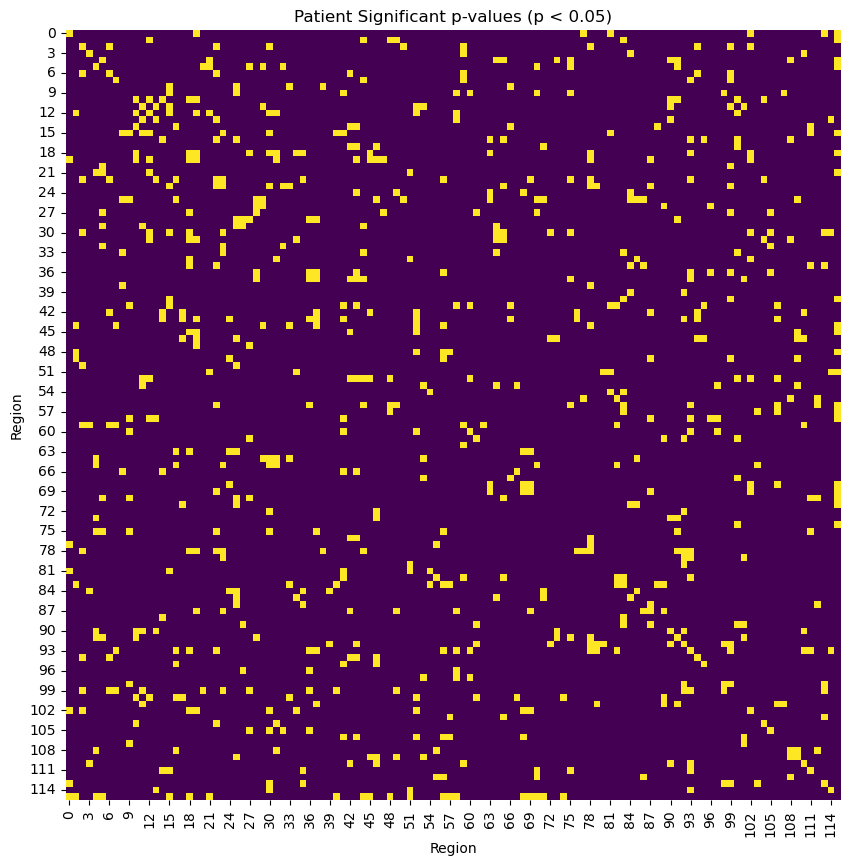

In [50]:
plt.figure(figsize=(10, 10))
sns.heatmap(p_significant_patient, cmap='viridis', cbar=False)
plt.title(f'Patient Significant p-values (p < {SIGNIFICANCE_LEVEL})')
plt.xlabel('Region')
plt.ylabel('Region')
plt.show()

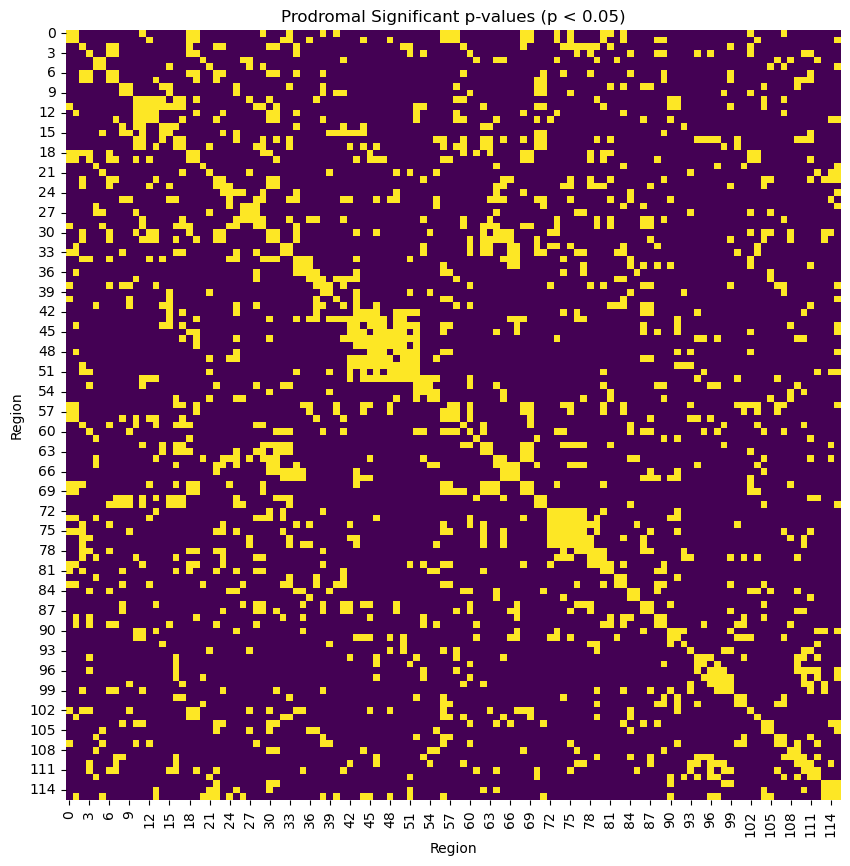

In [51]:
plt.figure(figsize=(10, 10))
sns.heatmap(p_significant_prodromal, cmap='viridis', cbar=False)
plt.title(f'Prodromal Significant p-values (p < {SIGNIFICANCE_LEVEL})')
plt.xlabel('Region')
plt.ylabel('Region')
plt.show()

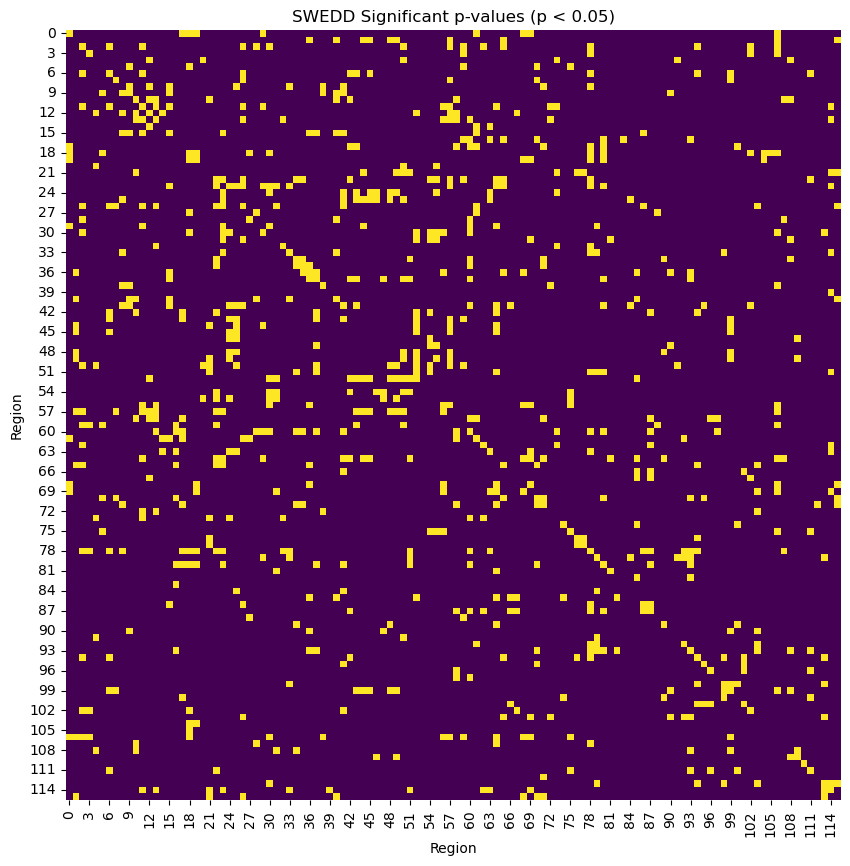

In [52]:
plt.figure(figsize=(10, 10))
sns.heatmap(p_significant_swedd, cmap='viridis', cbar=False)
plt.title(f'SWEDD Significant p-values (p < {SIGNIFICANCE_LEVEL})')
plt.xlabel('Region')
plt.ylabel('Region')
plt.show()

In [53]:
regions_list = regions.get_all_regions()
LH_regions = [regions_list[i] for i in range(0,len(regions_list),2)]
RH_regions = [regions_list[i] for i in range(1,len(regions_list),2)]
LH_regions_indices = [i for i in range(0,len(regions_list),2)]
RH_regions_indices = [i for i in range(1,len(regions_list),2)]
print(f'LH_regions: {len(LH_regions)}')
print(f'RH_regions: {len(RH_regions)}')
print(f'LH_regions_indices: {LH_regions_indices}')
print(f'RH_regions_indices: {RH_regions_indices}')

LH_regions: 58
RH_regions: 58
LH_regions_indices: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114]
RH_regions_indices: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115]


In [54]:
## Aggregated Asymmetry Study
def get_asymmetry_index(matrix, method=ASYM_DIFF_METHOD):
    means = np.mean(matrix, axis=1)
    ai = []
    for i in range(0, len(means)-1, 2):
        if method == 'abs_diff':
            ai.append(np.abs(means[i] - means[i+1]))
        elif method == 'ai':
            ai.append((means[i] - means[i+1]) / (means[i] + means[i+1]))
        elif method == 'sq_diff':
            ai.append((means[i] - means[i+1])**2)
        elif method == 'log_ratio':
            ai.append(np.log(means[i] / means[i+1]))
        elif method == 'perc_diff':
            ai.append((means[i] - means[i+1]) / ((means[i] + means[i+1]) / 2) * 100)
        elif method == 'ratio':
            ai.append(means[i] / means[i+1])
        elif method == 'smape':
            ai.append(100 * (np.abs(means[i] - means[i+1]) / ((np.abs(means[i]) + np.abs(means[i+1])) / 2)))
    return ai

control_asymmetry_ais = np.array([get_asymmetry_index(matrix) for matrix in control_matrices])
patient_asymmetry_ais = np.array([get_asymmetry_index(matrix) for matrix in patient_matrices])
prodromal_asymmetry_ais = np.array([get_asymmetry_index(matrix) for matrix in prodromal_matrices])
swedd_asymmetry_ais = np.array([get_asymmetry_index(matrix) for matrix in swedd_matrices])
print(f'Control Asymmetry AIs: {control_asymmetry_ais.shape}, Patient Asymmetry AIs: {patient_asymmetry_ais.shape}, Prodormal Asymmetry AIs: {prodromal_asymmetry_ais.shape}, SWEDD Asymmetry AIs: {swedd_asymmetry_ais.shape}')
control_asymmetry_ais_means = np.mean(control_asymmetry_ais, axis=0)
patient_asymmetry_ais_means = np.mean(patient_asymmetry_ais, axis=0)
prodromal_asymmetry_ais_means = np.mean(prodromal_asymmetry_ais, axis=0)
swedd_asymmetry_ais_means = np.mean(swedd_asymmetry_ais, axis=0)

Control Asymmetry AIs: (15, 58), Patient Asymmetry AIs: (113, 58), Prodormal Asymmetry AIs: (67, 58), SWEDD Asymmetry AIs: (14, 58)


In [55]:
t_stat, p_values_asymmetry_patient = ttest_ind(control_asymmetry_ais, patient_asymmetry_ais, axis=0)
t_stat, p_values_asymmetry_prodromal = ttest_ind(control_asymmetry_ais, prodromal_asymmetry_ais, axis=0)
t_stat, p_values_asymmetry_swedd = ttest_ind(control_asymmetry_ais, swedd_asymmetry_ais, axis=0)

In [56]:
p_significant_asymmetry_patient = p_values_asymmetry_patient < SIGNIFICANCE_LEVEL
p_significant_asymmetry_prodromal = p_values_asymmetry_prodromal < SIGNIFICANCE_LEVEL
p_significant_asymmetry_swedd = p_values_asymmetry_swedd < SIGNIFICANCE_LEVEL

In [57]:
p_significant_count_patient = np.sum(p_significant_asymmetry_patient)
p_significant_count_prodromal = np.sum(p_significant_asymmetry_prodromal)
p_significant_count_swedd = np.sum(p_significant_asymmetry_swedd)
p_significant_percentage_patient = p_significant_count_patient / p_values_asymmetry_patient.size
p_significant_percentage_prodromal = p_significant_count_prodromal / p_values_asymmetry_prodromal.size
p_significant_percentage_swedd = p_significant_count_swedd / p_values_asymmetry_swedd.size
print(f"Number of significant patient p-values: {p_significant_count_patient} ({p_significant_percentage_patient:.2%})")
print(f"Number of significant prodromal p-values: {p_significant_count_prodromal} ({p_significant_percentage_prodromal:.2%})")
print(f"Number of significant SWEDD p-values: {p_significant_count_swedd} ({p_significant_percentage_swedd:.2%})")

Number of significant patient p-values: 2 (3.45%)
Number of significant prodromal p-values: 0 (0.00%)
Number of significant SWEDD p-values: 4 (6.90%)


In [58]:
patient_asymmetry_ais_significant_regions_indices = np.nonzero(p_significant_asymmetry_patient)[0]
patient_asymmetry_ais_significant_regions_indices = [(LH_regions_indices[i], RH_regions_indices[i]) for i in patient_asymmetry_ais_significant_regions_indices]
prodromal_asymmetry_ais_significant_regions_indices = np.nonzero(p_significant_asymmetry_prodromal)[0]
prodromal_asymmetry_ais_significant_regions_indices = [(LH_regions_indices[i], RH_regions_indices[i]) for i in prodromal_asymmetry_ais_significant_regions_indices]
swedd_asymmetry_ais_significant_regions_indices = np.nonzero(p_significant_asymmetry_swedd)[0]
swedd_asymmetry_ais_significant_regions_indices = [(LH_regions_indices[i], RH_regions_indices[i]) for i in swedd_asymmetry_ais_significant_regions_indices]

print(f'Patient Asymmetry AIs Significant Regions: {patient_asymmetry_ais_significant_regions_indices}')
print(f'Prodromal Asymmetry AIs Significant Regions: {prodromal_asymmetry_ais_significant_regions_indices}')
print(f'SWEDD Asymmetry AIs Significant Regions: {swedd_asymmetry_ais_significant_regions_indices}')

Patient Asymmetry AIs Significant Regions: [(38, 39), (46, 47)]
Prodromal Asymmetry AIs Significant Regions: []
SWEDD Asymmetry AIs Significant Regions: [(46, 47), (64, 65), (94, 95), (108, 109)]


In [59]:
patient_asymmetry_ais_significant_region_names = [(labels[i],labels[j]) for i,j in patient_asymmetry_ais_significant_regions_indices]
prodromal_asymmetry_ais_significant_region_names = [(labels[i], labels[j]) for i,j in prodromal_asymmetry_ais_significant_regions_indices]
swedd_asymmetry_ais_significant_region_names = [(labels[i], labels[j]) for i,j in swedd_asymmetry_ais_significant_regions_indices]

print(f'Patient Asymmetry AIs Significant Region Names: {patient_asymmetry_ais_significant_region_names}')
print(f'Prodromal Asymmetry AIs Significant Region Names: {prodromal_asymmetry_ais_significant_region_names}')
print(f'SWEDD Asymmetry AIs Significant Region Names: {swedd_asymmetry_ais_significant_region_names}')

Patient Asymmetry AIs Significant Region Names: [('ParaHippocampal_L', 'ParaHippocampal_R'), ('Lingual_L', 'Lingual_R')]
Prodromal Asymmetry AIs Significant Region Names: []
SWEDD Asymmetry AIs Significant Region Names: [('Lingual_L', 'Lingual_R'), ('Angular_L', 'Angular_R'), ('Cerebelum_3_L', 'Cerebelum_3_R'), ('Vermis_1_2', 'Vermis_3')]


In [60]:
patient_significant_nodes_indices = []
prodromal_significant_nodes_indices = []
swedd_significant_nodes_indices = []
for i,j in patient_asymmetry_ais_significant_regions_indices:
    patient_significant_nodes_indices.append(i)
    patient_significant_nodes_indices.append(j)
for i,j in prodromal_asymmetry_ais_significant_regions_indices:
    prodromal_significant_nodes_indices.append(i)
    prodromal_significant_nodes_indices.append(j)
for i,j in swedd_asymmetry_ais_significant_regions_indices:
    swedd_significant_nodes_indices.append(i)
    swedd_significant_nodes_indices.append(j)
print(f'Patient Significant Nodes Indices: {patient_significant_nodes_indices}')
print(f'Prodromal Significant Nodes Indices: {prodromal_significant_nodes_indices}')
print(f'SWEDD Significant Nodes Indices: {swedd_significant_nodes_indices}')

Patient Significant Nodes Indices: [38, 39, 46, 47]
Prodromal Significant Nodes Indices: []
SWEDD Significant Nodes Indices: [46, 47, 64, 65, 94, 95, 108, 109]


In [61]:
patient_nodes = coords[patient_significant_nodes_indices]
patient_labels = [labels[i] for i in patient_significant_nodes_indices]
prodromal_nodes = coords[prodromal_significant_nodes_indices]
prodromal_labels = [labels[i] for i in prodromal_significant_nodes_indices]
swedd_nodes = coords[swedd_significant_nodes_indices]
swedd_labels = [labels[i] for i in swedd_significant_nodes_indices]

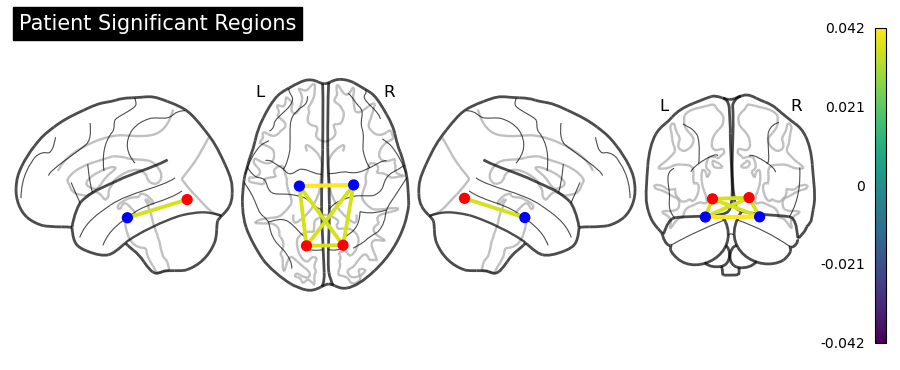

In [62]:
color_list = ['b', 'r', 'g', 'y', 'm', 'c', 'k', 'w', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime', 'teal', 'indigo', 'maroon', 'navy', 'peru', 'salmon', 'sienna', 'tan', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'yellow', 'yellowgreen']
edge_cmap = plt.cm.viridis
patient_node_color = []
for i in range(0,len(patient_significant_nodes_indices),2):
    patient_node_color.append(color_list[i//2])
    patient_node_color.append(color_list[i//2])

patient_curvatures = patient_matrix_population[patient_significant_nodes_indices,:][:,patient_significant_nodes_indices]
patient_curvatures = np.zeros((len(patient_significant_nodes_indices), len(patient_significant_nodes_indices)))
for i in range(len(patient_significant_nodes_indices)):
    for j in range(len(patient_significant_nodes_indices)):
        if i == j:
            patient_curvatures[i,j] = 1
            continue
        patient_curvatures[i,j] = patient_asymmetry_ais_means[i//2]
        patient_curvatures[j,i] = patient_asymmetry_ais_means[i//2]
# Plot the coordinates on the brain
view = plotting.plot_connectome(patient_curvatures, patient_nodes, node_size=50, title='Patient Significant Regions', node_color=patient_node_color, display_mode='lzry', edge_cmap=edge_cmap, colorbar=patient_curvatures.size>0)
plotting.show()

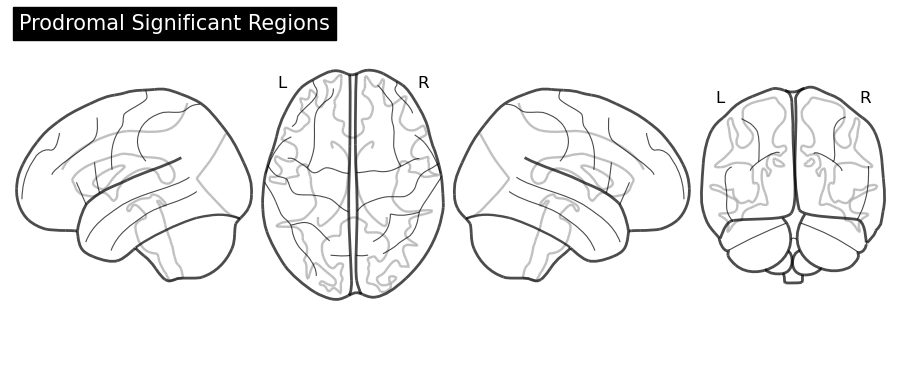

In [63]:
prodormal_node_color = []
for i in range(0,len(prodromal_significant_nodes_indices),2):
    prodormal_node_color.append(color_list[i//2])
    prodormal_node_color.append(color_list[i//2])

prodromal_curvatures = prodromal_matrix_population[prodromal_significant_nodes_indices,:][:,prodromal_significant_nodes_indices]
prodromal_curvatures = np.zeros((len(prodromal_significant_nodes_indices), len(prodromal_significant_nodes_indices)))
for i in range(len(prodromal_significant_nodes_indices)):
    for j in range(len(prodromal_significant_nodes_indices)):
        if i == j:
            prodromal_curvatures[i,j] = 1
            continue
        prodromal_curvatures[i,j] = prodromal_asymmetry_ais_means[i//2]
        prodromal_curvatures[j,i] = prodromal_asymmetry_ais_means[i//2]
# Plot the coordinates on the brain
view = plotting.plot_connectome(prodromal_curvatures, prodromal_nodes, node_size=50, title='Prodromal Significant Regions', node_color=prodormal_node_color, display_mode='lzry', edge_cmap='viridis', colorbar=prodromal_curvatures.size > 0)
plotting.show()

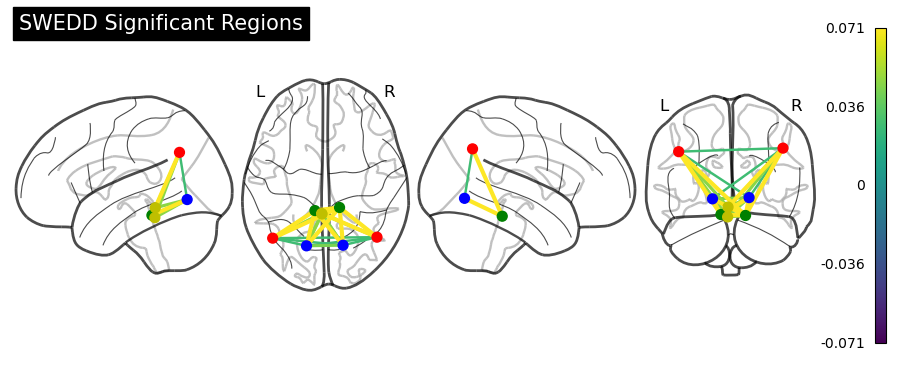

In [64]:
swedd_node_color = []
for i in range(0,len(swedd_significant_nodes_indices),2):
    swedd_node_color.append(color_list[i//2])
    swedd_node_color.append(color_list[i//2])

swedd_curvatures = swedd_matrix_population[swedd_significant_nodes_indices,:][:,swedd_significant_nodes_indices]
swedd_curvatures = np.zeros((len(swedd_significant_nodes_indices), len(swedd_significant_nodes_indices)))
for i in range(len(swedd_significant_nodes_indices)):
    for j in range(len(swedd_significant_nodes_indices)):
        if i == j:
            swedd_curvatures[i,j] = 1
            continue
        swedd_curvatures[i,j] = swedd_asymmetry_ais_means[i//2]
        swedd_curvatures[j,i] = swedd_asymmetry_ais_means[i//2]

# Plot the coordinates on the brain
plotting.plot_connectome(swedd_curvatures, swedd_nodes, node_size=50, title='SWEDD Significant Regions', node_color=swedd_node_color, display_mode='lzry', edge_cmap=edge_cmap, colorbar=swedd_curvatures.size>0)
plotting.show()